# Seaborn

## Plots de distribuições

Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

* distplot
* jointplot
* pairplot

Outra opção consiste em gráficos matriciais para traçar dados como matrizes codificadas por cores.

* heatmap




___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline

## Dados
Seaborn vem com conjuntos de dados embutidos.

In [2]:
datasets = sns.get_dataset_names()

/usr/lib/python3/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
tips = sns.load_dataset('tips')

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

O distplot mostra a distribuição de um conjunto de observações de uma variável.

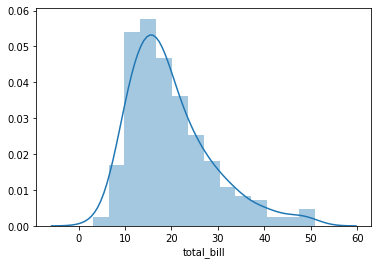

In [9]:
sns.distplot(tips['total_bill'])

Para remover a camada kde e apenas usar o histograma:

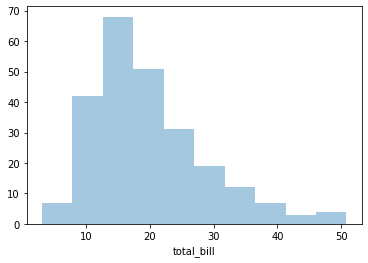

In [12]:
sns.distplot(tips['total_bill'],kde=False,bins=10)

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

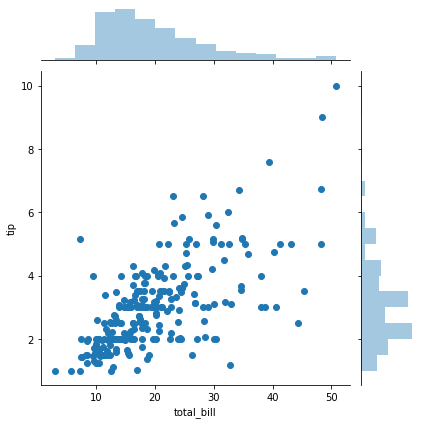

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

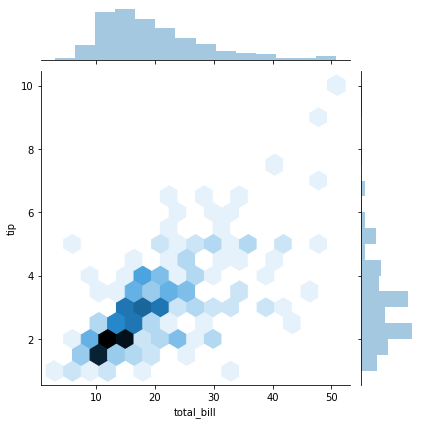

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

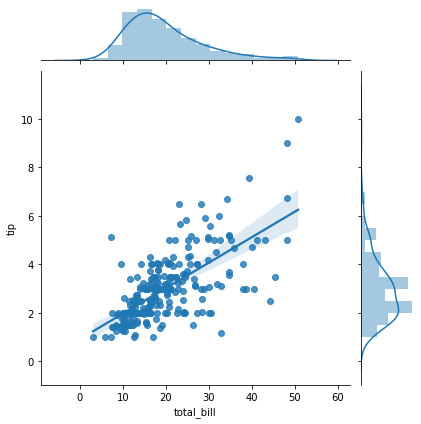

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

## pairplot

pairplot irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

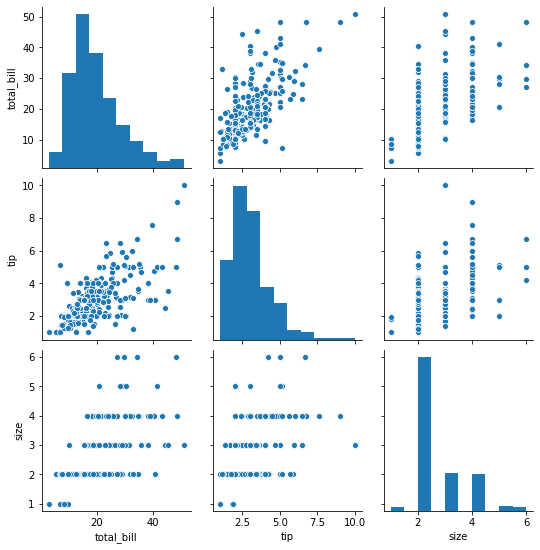

In [16]:
sns.pairplot(tips)

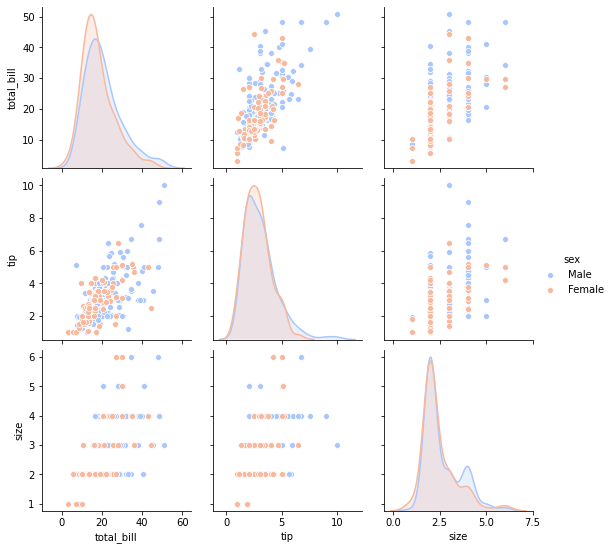

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## Heatmap

Para que um mapa de calor funcione corretamente, seus dados já devem estar em uma forma de matriz e a função sns.heatmap basicamente apenas põe cor pra você. Por exemplo:

In [18]:
import seaborn as sns

In [19]:
# Exemplo com a base de dados "Diamonds"
data = sns.load_dataset('diamonds')

In [22]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)

In [23]:
# Correlograma
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


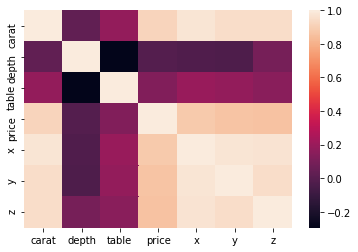

In [7]:
sns.heatmap(data.corr())

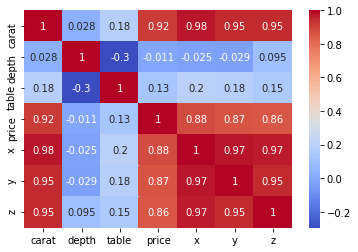

In [24]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

#### Selecionando os atributos desejados para comparação:

In [25]:
filter_data = data.pivot_table(values='price',index='cut',columns='clarity')

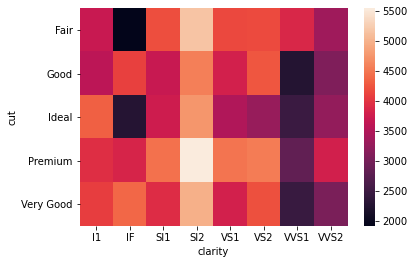

In [26]:
sns.heatmap(filter_data)

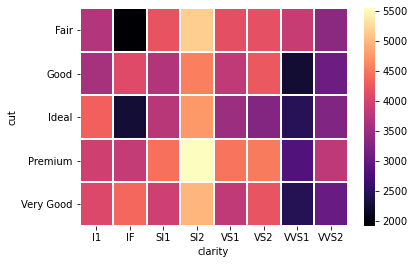

In [27]:
sns.heatmap(filter_data,cmap='magma',linecolor='white',linewidths=1)